In [15]:
library(latex2exp)

# Data examination

In a first step we present a concise overview table over the correlation lenght data.

In [16]:
# Presenting the correlation lenght data in a simple table
results <- read.csv("..\\data\\results_comp.csv", header = TRUE, sep = ",")

bin_size <- 8

d <- results[, c("index", "t", "temp", "comptype")]
colnames(d) <- c("index", "L", "temp", "info")

corr12 <- c()
corr12_err <- c()
for (index in d$index) {
	len <- read.csv(paste("..\\data\\comp_correlation_stats\\correlation_", index, "_len.csv", sep = ""), header = TRUE, sep = ",")
	corr12 <- append(corr12, len$corr12[len$bin_size == bin_size])
	corr12_err <- append(corr12_err, len$corr12_err[len$bin_size == bin_size])

	#fit <- read.csv(paste("..\\data\\comp_correlation_stats\\correlation_", index, "_fits.csv", sep = ""), header = TRUE, sep = ",")
	#corr12 <- append(corr12, fit$corr[fit$bin_size == bin_size])
}

d$corr12 <- corr12
d$corr12_err <- corr12_err
d$corr12_err_perc <- d$corr12_err / d$corr12
d$corr_beta_ratio <- d$corr12 / d$L



d <- d[order(d$temp), ]

results <- d

d16 <- d[d$L == 16
	& d$temp >= 0.25 & d$temp <= 0.3
	, ]
d24 <- d[d$L == 24
	& d$temp >= 0.2225 & d$temp <= 0.3
	, ]
d36 <- d[d$L == 36
	#& d$temp >= 0.215 & d$temp <= 0.3
	, ]
d54 <- d[d$L == 54
	#& d$temp >= 0.20 & d$temp <= 0.24
	, ]

d16
d24
d36
d54

comp <- rbind(d16, d24, d36, d54)

,index,L,temp,info,corr12,corr12_err,corr12_err_perc,corr_beta_ratio
,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
12,11,16,0.2500,100 Metropolis Simulations,17.279627,1.23856205,0.071677593,1.0799767
13,12,16,0.2525,100 Metropolis Simulations,15.171753,0.77886721,0.051336667,0.9482345
14,13,16,0.2550,100 Metropolis Simulations,13.509783,0.59086006,0.043735717,0.8443615
15,14,16,0.2575,100 Metropolis Simulations,12.656906,0.50472906,0.039877759,0.7910567
16,15,16,0.2600,100 Metropolis Simulations,11.840361,0.38404635,0.032435357,0.7400226
76,760,16,0.2625,100 Metropolis Simulations,11.389643,0.34303059,0.030117764,0.7118527
17,16,16,0.2650,100 Metropolis Simulations,10.528801,0.27645098,0.026256644,0.6580501
77,761,16,0.2675,100 Metropolis Simulations,9.692496,0.24420021,0.025194769,0.6057810
18,17,16,0.2700,100 Metropolis Simulations,9.036814,0.17800158,0.019697383,0.5648008


,index,L,temp,info,corr12,corr12_err,corr12_err_perc,corr_beta_ratio
,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
103,4284,24,0.2225,40 Metropolis Simulations,32.155650,7.21698569,0.224439116,1.3398188
22,192,24,0.2250,50 Metropolis Simulations,30.945158,6.16227890,0.199135482,1.2893816
104,4286,24,0.2275,210 Metropolis Simulations,26.142092,1.80918072,0.069205660,1.0892538
23,193,24,0.2300,170 Metropolis Simulations,26.120770,1.88467117,0.072152207,1.0883654
105,5003,24,0.2325,120 Metropolis Simulations,22.192838,1.45414274,0.065523064,0.9247016
24,195,24,0.2350,100 Metropolis Simulations,19.855036,1.27450730,0.064190631,0.8272932
25,196,24,0.2375,100 Metropolis Simulations,18.652509,0.98903731,0.053024359,0.7771879
26,197,24,0.2400,83 Metropolis Simulations,16.683896,0.75753455,0.045405135,0.6951623
27,198,24,0.2425,83 Metropolis Simulations,15.668840,0.62285751,0.039751347,0.6528683


,index,L,temp,info,corr12,corr12_err,corr12_err_perc,corr_beta_ratio
,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
126,5448,36,0.2000,1 Metropolis Simulations,2349.424031,1.616512e+04,6.88046026,65.2617786
38,380,36,0.2100,21 Metropolis Simulations,38.810193,1.263469e+01,0.32555078,1.0780609
100,4074,36,0.2125,90 Metropolis Simulations,32.517650,2.857013e+00,0.08786037,0.9032681
101,4075,36,0.2150,90 Metropolis Simulations,32.553679,2.802952e+00,0.08610245,0.9042689
102,4076,36,0.2175,90 Metropolis Simulations,27.146406,1.746237e+00,0.06432663,0.7540668
39,381,36,0.2200,91 Metropolis Simulations,25.417485,1.408106e+00,0.05539910,0.7060412
90,1201,36,0.2225,120 Metropolis Simulations,23.280704,1.009433e+00,0.04335920,0.6466862
40,382,36,0.2250,30 Metropolis Simulations,20.523322,1.371409e+00,0.06682196,0.5700923
91,1203,36,0.2275,20 Metropolis Simulations,18.433041,1.179456e+00,0.06398596,0.5120289


,index,L,temp,info,corr12,corr12_err,corr12_err_perc,corr_beta_ratio
,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
57,570,54,0.2100,30 Metropolis Simulations,28.660007,2.1634490,0.07548669,0.5307409
128,5605,54,0.2125,52 Metropolis Simulations,25.943008,1.4253710,0.05494239,0.4804261
129,5606,54,0.2150,32 Metropolis Simulations,24.795212,1.4122539,0.05695672,0.4591706
130,5607,54,0.2175,32 Metropolis Simulations,25.771481,1.6558565,0.06425151,0.4772496
58,571,54,0.2200,35 Metropolis Simulations,20.486215,0.8591242,0.04193670,0.3793743
131,5617,54,0.2225,25 Metropolis Simulations,20.251231,0.8551940,0.04222923,0.3750228
59,572,54,0.2250,35 Metropolis Simulations,18.542697,0.6629775,0.03575410,0.3433833
132,5619,54,0.2275,25 Metropolis Simulations,16.887596,0.5924111,0.03507966,0.3127333
60,573,54,0.2300,23 Metropolis Simulations,15.563764,0.4616294,0.02966053,0.2882178


## Compounded correlation lengths

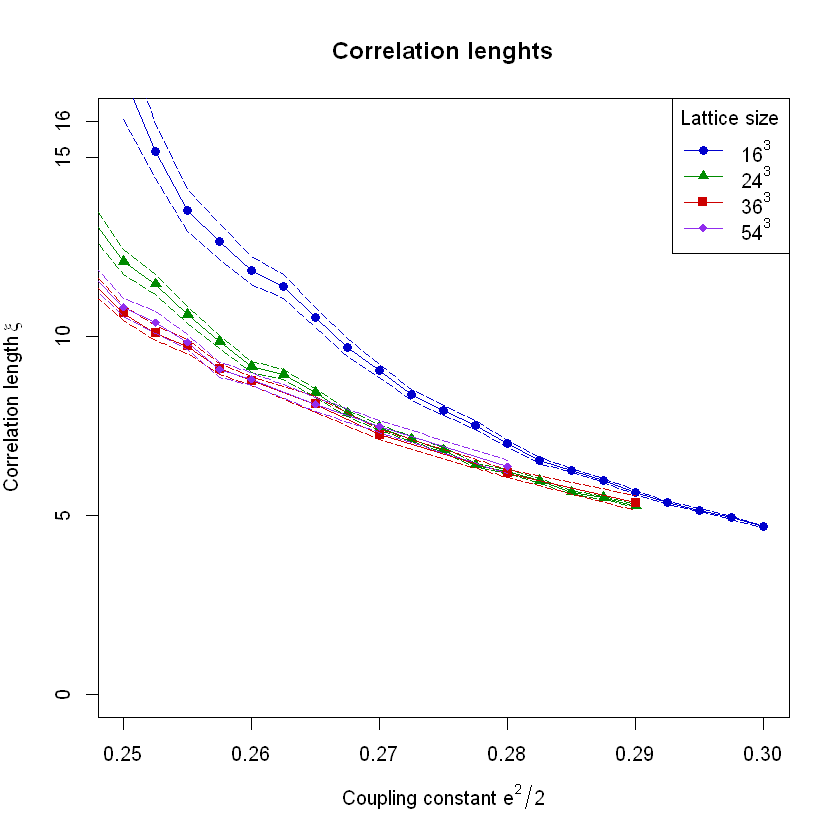

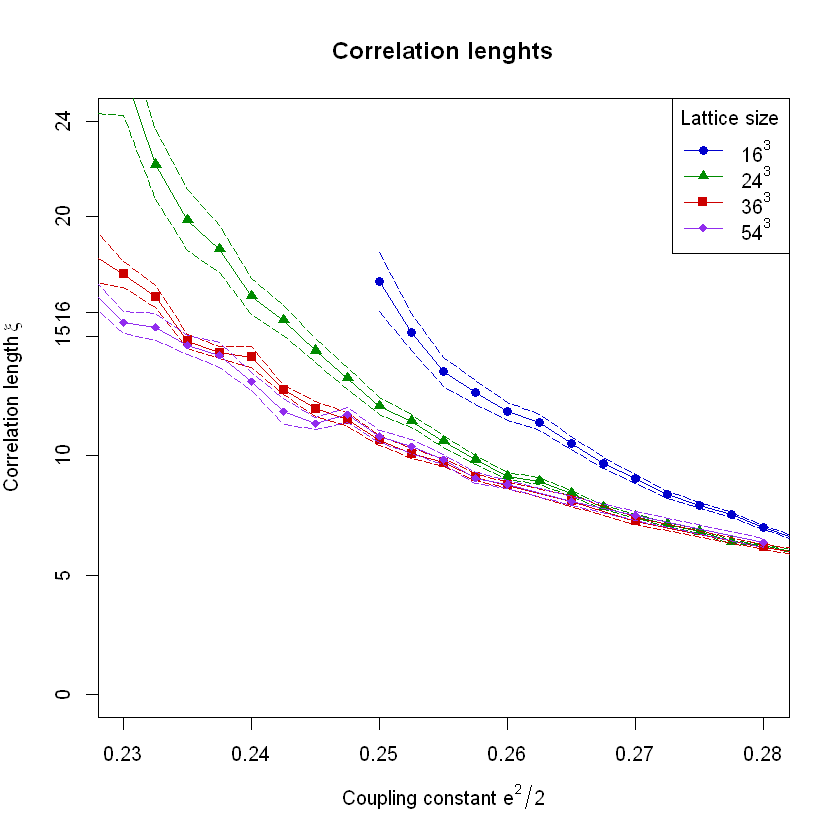

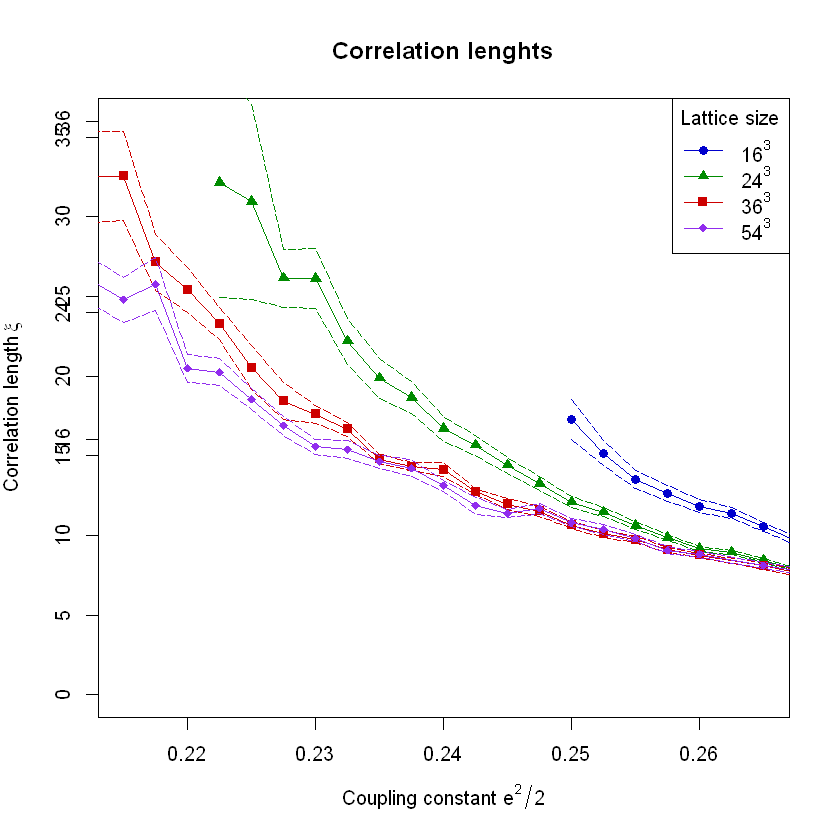

png 
  2

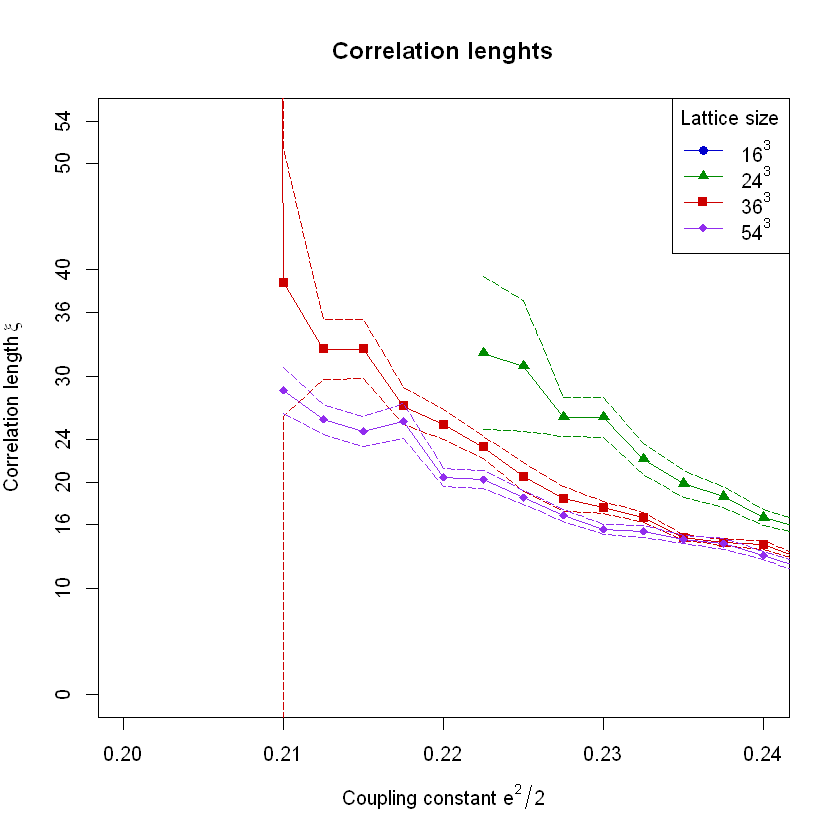

In [17]:
sizes <- c(16, 24 ,36, 54)
lower_xlim <- c(0.25, 0.23, 0.215, 0.2)
upper_xlim <- c(0.3, 0.28, 0.265, 0.24)
cols <- c("blue3", "green4", "red3", "purple2")
pchs <- c(16, 17, 15, 18)

correlation_length_plot <- function(xlim, size, dotted_lines) {
	plot(NULL, xlim = xlim, ylim = c(0, size), xlab = TeX("Coupling constant $e^2 / 2$"), ylab = TeX("Correlation length $\\xi$"))

	if (dotted_lines) for (x in sizes) lines(c(0, 1), c(x, x), lty = 3, col = adjustcolor("black", alpha.f = 0.8))

	for (i in 1:4) {
		size <- sizes[i]
		col <- cols[i]
		d <- comp[comp$L == size, c("L", "temp", "corr12", "corr12_err")]
		upper <- d$corr12 + d$corr12_err
		lower <- d$corr12 - d$corr12_err
		lines(d$temp, upper, lty = 5, col = col)
		lines(d$temp, lower, lty = 5, col = col)
		points(corr12 ~ temp, data = d, col = col, pch = pchs[i])
		lines(corr12 ~ temp, data = d, col = col)
		axis(2, at = c(size), labels = c(size))
	}

	legend("topright", legend = TeX(paste("$", sizes, "^3$", sep = "")), col = cols, lty = c(1, 1, 1, 1), pch = pchs, title = "Lattice size")
	title(paste("Correlation lenghts"))	
}

for (i in 1:4) {
	size <- sizes[i]
	xlim <- c(lower_xlim[i], upper_xlim[i])
	
	correlation_length_plot(xlim, size, FALSE)
}

png(filename = paste("plots\\correlation_length_plot.png", sep = ""),
	width = 1440, height = 1440, type = c("cairo-png"), res = 200)
correlation_length_plot(c(0.21, 0.29), 45, TRUE)
dev.off()

## Step-scaling functions

Here we plot the step-scaling functions $\xi (1.5 L) / \xi (L) \sim \xi(L) / L$. In a first step, we only utilize the correlation lenghts `corr12`, that only considers the first and second non-zero momentum modes.

In [18]:
# Loading data
d <- comp[, c("index", "L", "temp", "corr12", "corr12_err_perc")]

# Building the x and y axis data
d$corr_beta_ratio <- d$corr12 / d$L
d$corr_beta_ratio_err_perc <- d$corr12_err_perc
d$corr_beta_ratio_err <- d$corr_beta_ratio * d$corr_beta_ratio_err_perc

d$corr12_15 <- 0
d$corr12_15_err_perc <- 0
for (i in 1:nrow(d)) {
	my_temp <- d$temp[i]
	next_size <- d$L[i] * 3 / 2
	d$corr12_15[i] <- ifelse(next_size %in% d$L,
		ifelse(my_temp %in% d$temp[d$L == next_size],
		d$corr12[d$temp == my_temp & d$L == next_size][1], 0), 0)
	d$corr12_15_err_perc[i] <- ifelse(next_size %in% d$L,
		ifelse(my_temp %in% d$temp[d$L == next_size],
		d$corr12_err_perc[d$temp == my_temp & d$L == next_size][1], 0), 0)
}
d <- d[d$corr12_15 != 0, ]
d$corr_step_ratio <- d$corr12_15 / d$corr12
d$corr_step_ratio_err_perc <- d$corr12_err_perc + d$corr12_15_err_perc

d$corr_step_ratio_err <- d$corr_step_ratio * d$corr_step_ratio_err_perc

d <- d[d$corr12 <= d$L, ]

d16 <- d[d$L == 16, ]
d24 <- d[d$L == 24, ]
d36 <- d[d$L == 36, ]

#d16 <- d16[d16$temp >= 0.26 & d16$temp <= 0.40, ]
#d24 <- d24[d24$temp >= 0.24 & d24$temp <= 0.37, ]
#d36 <- d36[d36$temp >= 0.23 & d36$temp <= 0.31, ]

d16
d24
d36

dat <- rbind(d16, d24, d36)

,index,L,temp,corr12,corr12_err_perc,corr_beta_ratio,corr_beta_ratio_err_perc,corr_beta_ratio_err,corr12_15,corr12_15_err_perc,corr_step_ratio,corr_step_ratio_err_perc,corr_step_ratio_err
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13,12,16,0.2525,15.171753,0.051336667,0.9482345,0.051336667,0.048679201,11.451516,0.024232245,0.7547919,0.07556891,0.05703880
14,13,16,0.2550,13.509783,0.043735717,0.8443615,0.043735717,0.036928754,10.599151,0.023293248,0.7845537,0.06702897,0.05258782
15,14,16,0.2575,12.656906,0.039877759,0.7910567,0.039877759,0.031545566,9.842550,0.018996048,0.7776426,0.05887381,0.04578278
16,15,16,0.2600,11.840361,0.032435357,0.7400226,0.032435357,0.024002897,9.147775,0.017294090,0.7725926,0.04972945,0.03842060
76,760,16,0.2625,11.389643,0.030117764,0.7118527,0.030117764,0.021439412,8.933482,0.016149448,0.7843513,0.04626721,0.03628975
17,16,16,0.2650,10.528801,0.026256644,0.6580501,0.026256644,0.017278186,8.425214,0.014782931,0.8002064,0.04103958,0.03284013
77,761,16,0.2675,9.692496,0.025194769,0.6057810,0.025194769,0.015262513,7.847606,0.011586867,0.8096578,0.03678164,0.02978054
18,17,16,0.2700,9.036814,0.019697383,0.5648008,0.019697383,0.011125099,7.451300,0.010967113,0.8245494,0.03066450,0.02528439
78,762,16,0.2725,8.366345,0.018327098,0.5228966,0.018327098,0.009583177,7.131510,0.010223566,0.8524045,0.02855066,0.02433671


,index,L,temp,corr12,corr12_err_perc,corr_beta_ratio,corr_beta_ratio_err_perc,corr_beta_ratio_err,corr12_15,corr12_15_err_perc,corr_step_ratio,corr_step_ratio_err_perc,corr_step_ratio_err
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
105,5003,24,0.2325,22.192838,0.065523064,0.9247016,0.065523064,0.060589281,16.660539,0.02749811,0.7507169,0.09302117,0.06983257
24,195,24,0.2350,19.855036,0.064190631,0.8272932,0.064190631,0.053104471,14.785388,0.01972463,0.7446669,0.08391526,0.06248892
25,196,24,0.2375,18.652509,0.053024359,0.7771879,0.053024359,0.041209888,14.313925,0.01786171,0.7673995,0.07088607,0.05439793
26,197,24,0.2400,16.683896,0.045405135,0.6951623,0.045405135,0.031563940,14.121917,0.03138280,0.8464400,0.07678793,0.06499638
27,198,24,0.2425,15.668840,0.039751347,0.6528683,0.039751347,0.025952396,12.756735,0.01551093,0.8141467,0.05526228,0.04499161
28,199,24,0.2450,14.395331,0.034767476,0.5998055,0.034767476,0.020853722,11.970165,0.02692151,0.8315310,0.06168898,0.05129630
29,200,24,0.2475,13.250851,0.034773201,0.5521188,0.034773201,0.019198938,11.506635,0.02599047,0.8683695,0.06076367,0.05276532
30,201,24,0.2500,12.074537,0.028500487,0.5031057,0.028500487,0.014338758,10.648702,0.01873305,0.8819139,0.04723354,0.04165591
31,202,24,0.2525,11.451516,0.024232245,0.4771465,0.024232245,0.011562331,10.088431,0.02123029,0.8809691,0.04546253,0.04005108


,index,L,temp,corr12,corr12_err_perc,corr_beta_ratio,corr_beta_ratio_err_perc,corr_beta_ratio_err,corr12_15,corr12_15_err_perc,corr_step_ratio,corr_step_ratio_err_perc,corr_step_ratio_err
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,4074,36,0.2125,32.517650,0.08786037,0.9032681,0.08786037,0.079361464,25.943008,0.05494239,0.7978131,0.14280276,0.11392992
101,4075,36,0.2150,32.553679,0.08610245,0.9042689,0.08610245,0.077859765,24.795212,0.05695672,0.7616716,0.14305917,0.10896410
102,4076,36,0.2175,27.146406,0.06432663,0.7540668,0.06432663,0.048506576,25.771481,0.06425151,0.9493515,0.12857814,0.12206584
39,381,36,0.2200,25.417485,0.05539910,0.7060412,0.05539910,0.039114048,20.486215,0.04193670,0.8059891,0.09733579,0.07845159
90,1201,36,0.2225,23.280704,0.04335920,0.6466862,0.04335920,0.028039796,20.251231,0.04222923,0.8698719,0.08558843,0.07445098
40,382,36,0.2250,20.523322,0.06682196,0.5700923,0.06682196,0.038094686,18.542697,0.03575410,0.9034939,0.10257607,0.09267685
91,1203,36,0.2275,18.433041,0.06398596,0.5120289,0.06398596,0.032762663,16.887596,0.03507966,0.9161590,0.09906562,0.09075986
41,383,36,0.2300,17.595272,0.03162671,0.4887576,0.03162671,0.015457793,15.563764,0.02966053,0.8845424,0.06128724,0.05421116
42,384,36,0.2325,16.660539,0.02749811,0.4627928,0.02749811,0.012725925,15.380515,0.03718158,0.9231703,0.06467968,0.05971036


In [19]:
build_polygon_from_points_with_errors <- function(x, x_err, y, y_err, col) {
	d <- data.frame(x, x_err, y, y_err)
	d <- d[order(d$x), ]

	show(d)

	# Initialize the arrays
	x_top_ary <- c(d$x[1] - d$x_err[1], d$x[1] + d$x_err[1])
	y_top_ary <- c(d$y[1] + d$y_err[1], d$y[1] + d$y_err[1])
	x_bot_ary <- c(d$x[1] - d$x_err[1], d$x[1] + d$x_err[1])
	y_bot_ary <- c(d$y[1] - d$y_err[1], d$y[1] - d$y_err[1])

	for (i in 2:length(x)) {
		x_top_ary <- append(x_top_ary, c(d$x[i] - d$x_err[i], d$x[i] + d$x_err[i]))
		y_top_ary <- append(y_top_ary, c(d$y[i] + d$y_err[i], d$y[i] + d$y_err[i]))
		x_bot_ary <- append(x_bot_ary, c(d$x[i] - d$x_err[i], d$x[i] + d$x_err[i]))
		y_bot_ary <- append(y_bot_ary, c(d$y[i] - d$y_err[i], d$y[i] - d$y_err[i]))
	}

	# Make it such that the arrays are increasing
	top <- data.frame(list(x = x_top_ary, y = y_top_ary))
	bot <- data.frame(list(x = x_bot_ary, y = y_bot_ary))

	top$include <- TRUE
	bot$include <- TRUE

	for (i in 1:nrow(d)) {
		margin <- 0.9
		above <- d$y[i] + d$y_err[i] * margin
		right <- d$x[i] + d$x_err[i] * margin
		below <- d$y[i] - d$y_err[i] * margin
		left <- d$x[i] - d$x_err[i] * margin

		top$include <- top$include & (top$y > above | top$x > right | top$y < below | top$x < left)
		bot$include <- bot$include & (bot$y > above | bot$x > right | bot$y < below | bot$x < left)
	}

	show(top)
	show(bot)

	top <- top[top$include, ]
	bot <- bot[bot$include, ]

	

	polygon(append(top$x, rev(bot$x)), append(top$y, rev(bot$y)),
	col = col, lty = 0)
}

In [20]:
build_square_err_around_points <- function(x, x_err, y, y_err, col) {
	d <- data.frame(x, x_err, y, y_err)

	for (i in 1:nrow(d)) {
		x_ary <- c(d$x[i] - d$x_err[i], d$x[i] + d$x_err[i], d$x[i] + d$x_err[i], d$x[i] - d$x_err[i])
		y_ary <- c(d$y[i] + d$y_err[i], d$y[i] + d$y_err[i], d$y[i] - d$y_err[i], d$y[i] - d$y_err[i])

		polygon(x_ary, y_ary, col = col, lty = 0)
	}
}

In [21]:
png(filename = "plots\\step_scaling_function.png", width = 1440, height = 1440, type = c("cairo-png"), res = 200)
plot(
	corr_step_ratio ~ corr_beta_ratio,
	data = d16,
	col = "blue3",
	type = "o",
	pch = 19,
	xlim = c(0.4, 1.0),
	ylim = c(0.5, 1.1),
	xlab = TeX("$\\xi(L) / L$"),
	ylab = TeX("$\\xi(1.5L) / \\xi(L)$")
)
build_square_err_around_points(d16$corr_beta_ratio, d16$corr_beta_ratio_err, d16$corr_step_ratio, d16$corr_step_ratio_err, adjustcolor("blue3", alpha.f = 0.2))
if(TRUE) {
	points(corr_step_ratio ~ corr_beta_ratio, data = d24, col = "green4", pch = 17)
	lines(corr_step_ratio ~ corr_beta_ratio, data = d24, col = "green4", pch = 17)
	if(TRUE) build_square_err_around_points(d24$corr_beta_ratio, d24$corr_beta_ratio_err, d24$corr_step_ratio, d24$corr_step_ratio_err, adjustcolor("green4", alpha.f = 0.2))
}
if(TRUE) {
	points(corr_step_ratio ~ corr_beta_ratio, data = d36, col = "red3", pch = 15)
	lines(corr_step_ratio ~ corr_beta_ratio, data = d36, col = "red3", pch = 15)
	if(TRUE) build_square_err_around_points(d36$corr_beta_ratio, d36$corr_beta_ratio_err, d36$corr_step_ratio, d36$corr_step_ratio_err, adjustcolor("red3", alpha.f = 0.2))
}
title("1.5-step-scaling function")
legend("topright", y = c(TeX("$16^3$"), TeX("$24^3$"), TeX("$36^3$")), lty = c(1, 1, 1), pch = c(19, 17, 15), col = c("blue3", "green4", "red3"), title = "Lattice size")
points(d$corr_beta_ratio[d$temp == 0.26], d$corr_step_ratio[d$temp == 0.26])
lines(c(0, 1), c(1, 1), lty = 3, col = adjustcolor("black", alpha.f = 0.8))
dev.off()

png 
  2

## Compounded correlation function plots

In [22]:
indices <- c(15, 1390, 195, 205, 381, 387, 5123, 5142)
for (index in indices) {

	res <- read.csv(paste("..\\data\\comp_correlation_stats\\correlation_", index, "_res.csv", sep = ""), header = FALSE)
	err <- read.csv(paste("..\\data\\comp_correlation_stats\\correlation_", index, "_err.csv", sep = ""), header = FALSE)
	fit <- read.csv(paste("..\\data\\comp_correlation_stats\\correlation_", index, "_fits.csv", sep = ""), header = TRUE)

	d <- data.frame(unname(unlist(res[res$V1 == bin_size, -1])))
	colnames(d) <- c("corr_fn")

	d$corr_fn_err <- unname(unlist(err[err$V1 == bin_size, -1]))
	d$index <- 1:nrow(d) - 1
	d$corr_fn <- d$corr_fn[d$index == (nrow(d) / 2)] - d$corr_fn

	d$sym_corr_fn <- d$corr_fn
	for (i in 1:(nrow(d) - 1)) {
		d$sym_corr_fn[d$index == i] <- (d$corr_fn[d$index == i] + d$corr_fn[d$index == (nrow(d) - i)]) / 2
	}
	d$corr_fn <- d$sym_corr_fn

	params <- fit[fit$bin_size == bin_size, ]
	d$fit <- params$a * cosh(params$m * (d$index - params$n / 2)) + params$b

	png(filename = paste("plots\\correlation_function_plot_", index, ".png", sep = ""), width = 1440, height = 1440, res = 270, type = "cairo-png")
	plot(d$index, d$corr_fn, xlab = "t", ylab = "Correlation function C(t)")
	title(TeX(paste("Correlation function on a $", results$L[results$index == index], "^3$ lattice", sep = ""), bold = TRUE))
	legend("top", legend = TeX(paste("$e^2 / 2 =$ ", round(results$temp[results$index == index],  digits = 4),
		", $\\xi =$ ", round(results$corr12[results$index == index], digits = 2),
		", $\\sigma =$ ", round(results$corr12_err[results$index == index], digits = 2), sep = "")), box.lty = 0)
	box()

	d$upper <- d$corr_fn + d$corr_fn_err
	d$lower <- d$corr_fn - d$corr_fn_err
	y_shade <- c()
	for (entry in d$upper) {
		y_shade <- append(y_shade, entry)
	}
	for (entry in rev(d$lower)) {
		y_shade <- append(y_shade, entry)
	}
	x_shade <- c(d$index, rev(d$index))
	polygon(x_shade, y_shade, col = "lightgray", lty = 0)
	points(d$index, d$corr_fn)
	lines(d$index, d$fit)
	dev.off()
}